In [65]:
library("dtw")

In [1]:
df=read.csv("df_alliend_data.csv")

In [11]:
df[2,"trajectory__case"]

[1] 0

In [21]:
zz=unique(df["trajectory__runNum"])

In [28]:
runNum=unname(unlist(unique(df["trajectory__runNum"])))
case=unname(unlist(unique(df["trajectory__case"])))

In [93]:
#which(df["trajectory__runNum"]==1 & df["trajectory__case"]==2)

series=list()
for (rn in runNum)
{
    series[[rn]] <- list()
    for(ca in case)
        {
            series[[rn]][[ca+1]]=ts(df[which(df["trajectory__runNum"]==1 & df["trajectory__case"]==2),"trajectory__wbad"])
    }
    
}

In [100]:
zz=dtw(series[[1]][[1]],series[[1]][[1]])

In [101]:
str(zz)

List of 15
 $ stepPattern       : stepPattern [1:6, 1:4] 1 1 2 2 3 3 1 0 0 0 ...
  ..- attr(*, "npat")= num 3
  ..- attr(*, "norm")= chr "N+M"
 $ N                 : int 2477
 $ M                 : int 2477
 $ call              : language dtw(x = series[[1]][[1]], y = series[[1]][[1]])
 $ openEnd           : logi FALSE
 $ openBegin         : logi FALSE
 $ windowFunction    :function (iw, jw, ...)  
 $ jmin              : int 2477
 $ distance          : num 0
 $ normalizedDistance: num 0
 $ index1            : num [1:2477] 1 2 3 4 5 6 7 8 9 10 ...
 $ index2            : num [1:2477] 1 2 3 4 5 6 7 8 9 10 ...
 $ index1s           : num [1:2477] 1 2 3 4 5 6 7 8 9 10 ...
 $ index2s           : num [1:2477] 1 2 3 4 5 6 7 8 9 10 ...
 $ stepsTaken        : int [1:2476] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "dtw"


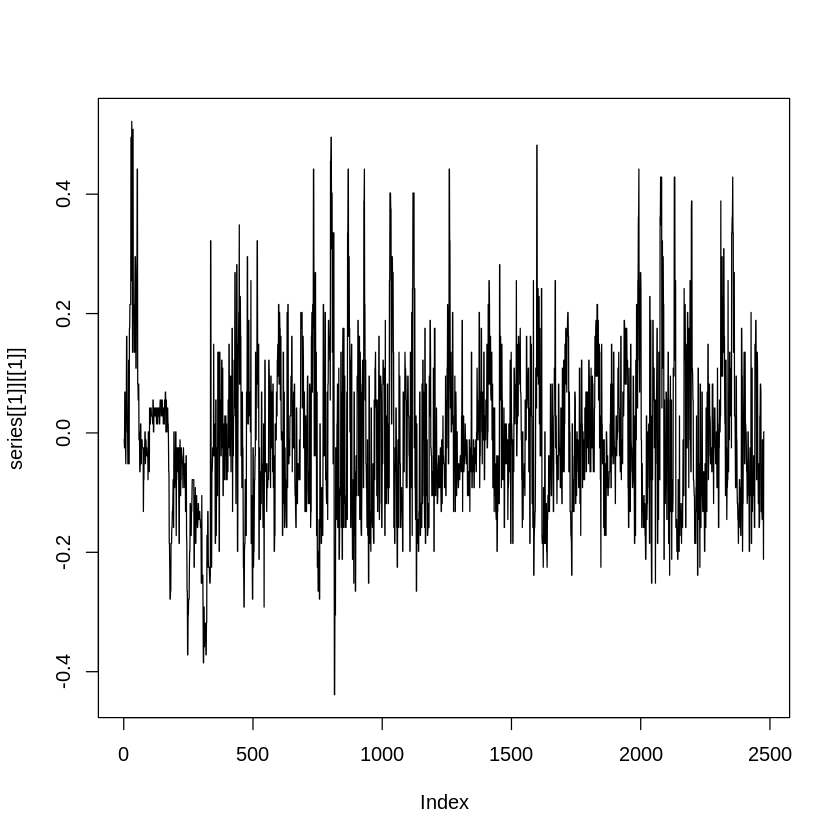

In [72]:
plot(series[[1]][[1]],type='l')

In [84]:
zz=dtw(series[[2]][[1]],series[[1]][[3]])

In [85]:
str(zz)

List of 15
 $ stepPattern       : stepPattern [1:6, 1:4] 1 1 2 2 3 3 1 0 0 0 ...
  ..- attr(*, "npat")= num 3
  ..- attr(*, "norm")= chr "N+M"
 $ N                 : int 2477
 $ M                 : int 2477
 $ call              : language dtw(x = series[[2]][[1]], y = series[[1]][[3]])
 $ openEnd           : logi FALSE
 $ openBegin         : logi FALSE
 $ windowFunction    :function (iw, jw, ...)  
 $ jmin              : int 2477
 $ distance          : num 0
 $ normalizedDistance: num 0
 $ index1            : num [1:2477] 1 2 3 4 5 6 7 8 9 10 ...
 $ index2            : num [1:2477] 1 2 3 4 5 6 7 8 9 10 ...
 $ index1s           : num [1:2477] 1 2 3 4 5 6 7 8 9 10 ...
 $ index2s           : num [1:2477] 1 2 3 4 5 6 7 8 9 10 ...
 $ stepsTaken        : int [1:2476] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "dtw"


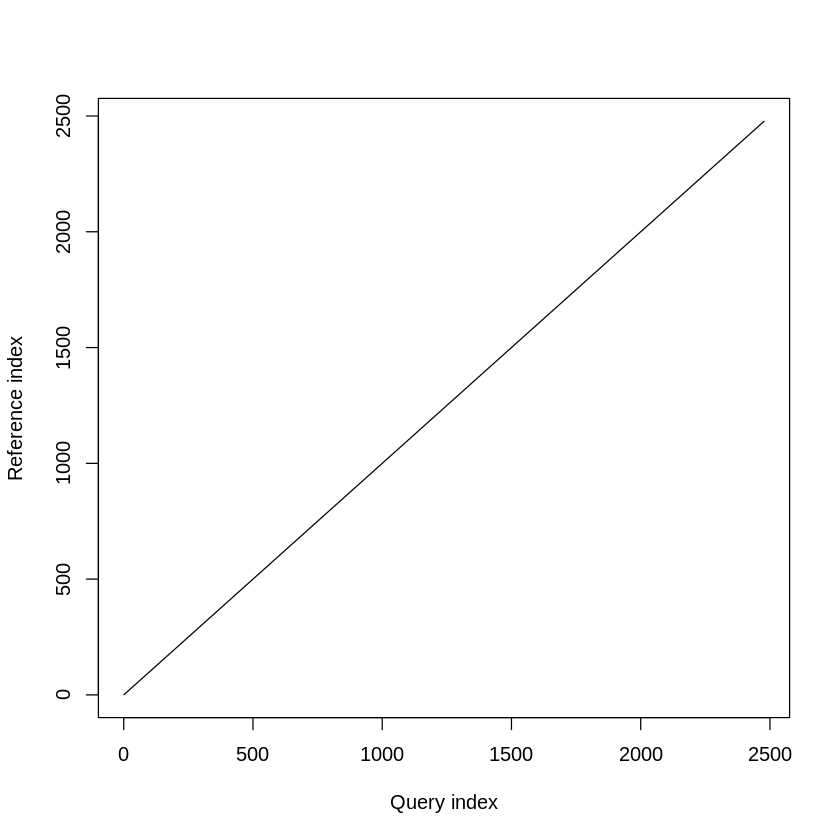

In [88]:
plot(zz)

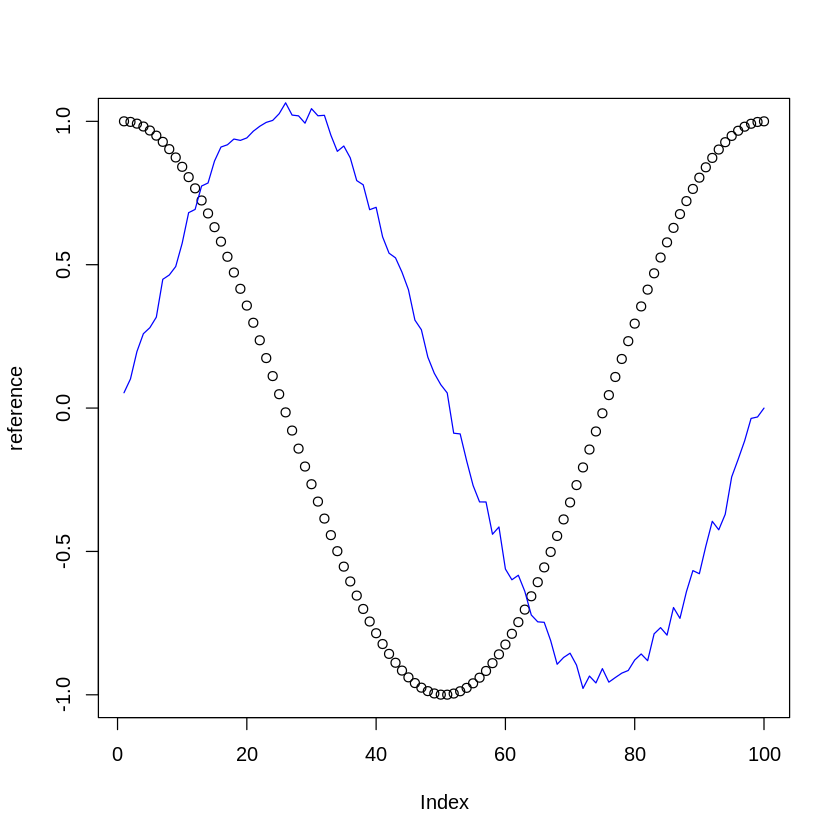

In [89]:
idx<-seq(0,6.28,len=100);
query<-sin(idx)+runif(100)/10;

## A cosine is for reference; sin and cos are offset by 25 samples
reference<-cos(idx)
plot(reference); lines(query,col="blue");

List of 15
 $ stepPattern       : stepPattern [1:6, 1:4] 1 1 2 2 3 3 1 0 0 0 ...
  ..- attr(*, "npat")= num 3
  ..- attr(*, "norm")= chr "N+M"
 $ N                 : int 100
 $ M                 : int 100
 $ call              : language dtw(x = query, y = reference)
 $ openEnd           : logi FALSE
 $ openBegin         : logi FALSE
 $ windowFunction    :function (iw, jw, ...)  
 $ jmin              : int 100
 $ distance          : num 27.3
 $ normalizedDistance: num 0.136
 $ index1            : num [1:156] 1 2 3 4 5 6 7 8 9 10 ...
 $ index2            : num [1:156] 1 1 1 1 1 1 1 1 1 1 ...
 $ index1s           : num [1:156] 1 2 3 4 5 6 7 8 9 10 ...
 $ index2s           : num [1:156] 1 1 1 1 1 1 1 1 1 1 ...
 $ stepsTaken        : int [1:155] 3 3 3 3 3 3 3 3 3 3 ...
 - attr(*, "class")= chr "dtw"
NULL


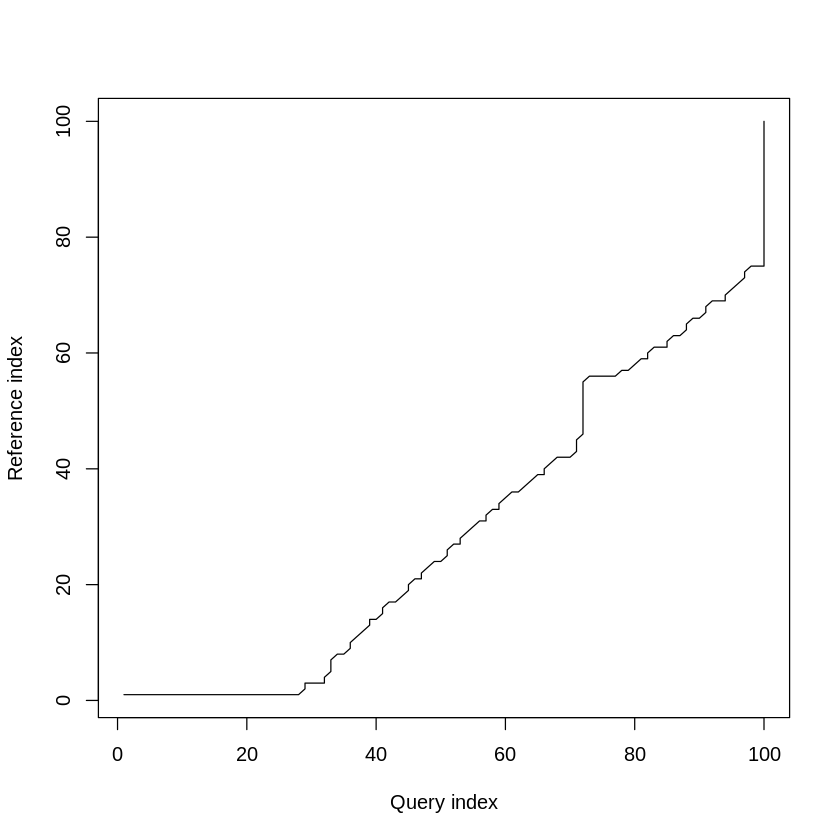

In [102]:
alignment<-dtw(query,reference);


## Display the mapping, AKA warping function - may be multiple-valued
## Equivalent to: plot(alignment,type="alignment")
print(str(alignment))
plot(alignment);

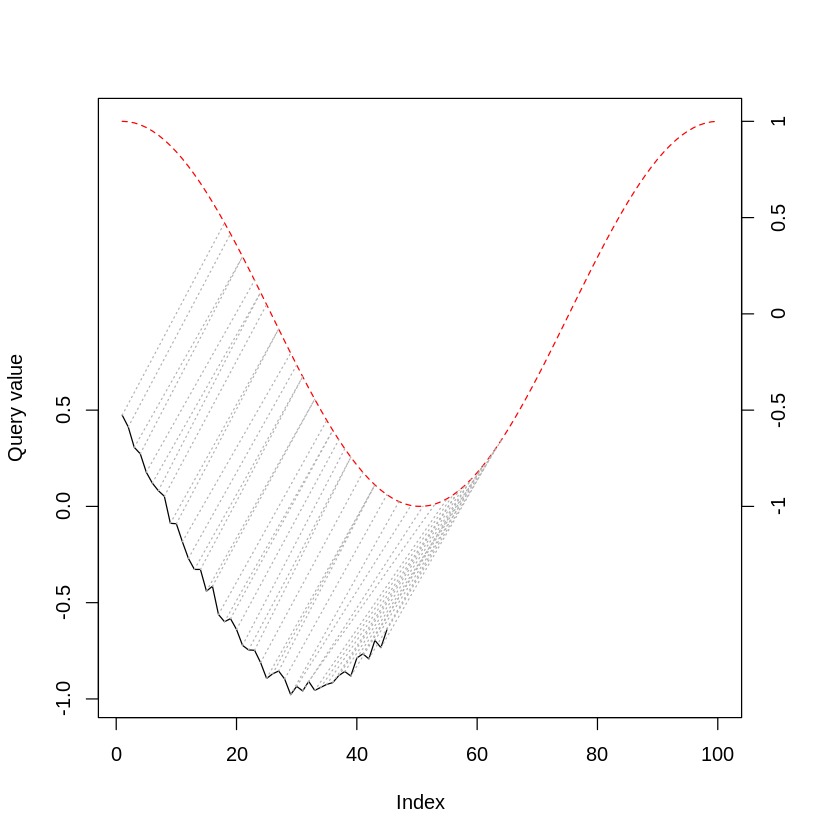

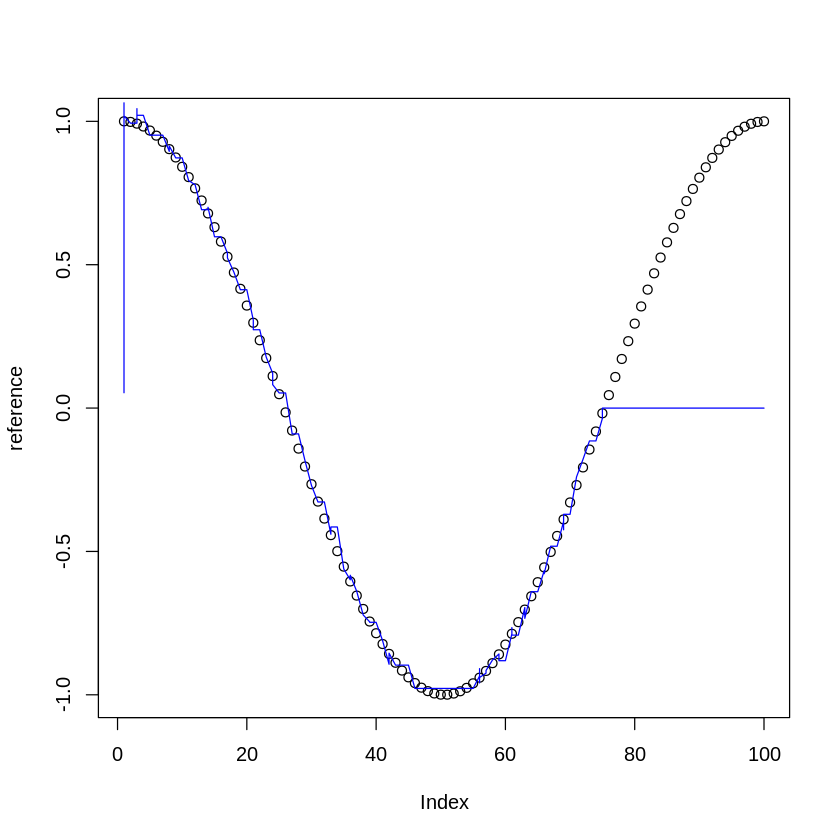

In [91]:
alignmentOBE <-
  dtw(query[44:88],reference,
      keep=TRUE,step=asymmetric,
      open.end=TRUE,open.begin=TRUE);
plot(alignmentOBE,type="two",off=1);


#########
##
## Subsetting allows warping and unwarping of
## timeseries according to the warping curve. 
## See first example below.
##

## Most useful: plot the warped query along with reference 
plot(reference)
lines(query[alignment$index1]~alignment$index2,col="blue")